# Import Necessary Modules

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir
from IPython.display import Image

%matplotlib inline

# Pre-Processing Of Data 

In order to crop the image(MRI) that only contains portion with the brain , extreme top , buttom , left and right contour cropping technique is used 

In [19]:
""" 
A Function to pre-process and crop the image(data)

"""
def crop_data(image , plot=False):
    
    #convert to grayscale and blurring for noise reduction using median blur tech.
    
    
    gray= cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
    gray= cv2.medianBlur(gray, 5)
    
    #threshold the image 
    #performing erosions and dilations for noise removal
    
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    
    #find contours and grab the largest
    
    conts = cv2.findContours(thresh.copy() , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)
    l = max(conts, key=cv2.contourArea)
    
    #find extreme points from the image
    extLeft = tuple(l[l[:, :, 0].argmin()][0])
    extRight = tuple(l[l[:, :, 0].argmax()][0])
    extTop = tuple(l[l[:, :, 1].argmin()][0])
    extBot = tuple(l[l[:, :, 1].argmax()][0])
    
    #crop on basis of extremes
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]
    
    #printing image
    
    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        
        plt.show()     
    
    
    return new_image
    
    

# Testing The Pre-Processing

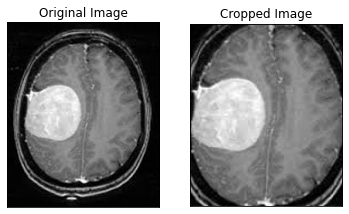

In [20]:
ex_img = cv2.imread('yes/Y1.jpg')
ex_new_img = crop_data(ex_img, True)